<a href="https://colab.research.google.com/github/macscheffer/AB-Demo/blob/master/DS41SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [3]:
train.shape, test.shape

((51916, 17), (17306, 17))

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
train.nunique()

Inspection ID      51916
DBA Name           17049
AKA Name           16350
License #          21421
Facility Type        329
Risk                   3
Address            13954
City                  39
State                  1
Zip                   86
Inspection Date     2257
Inspection Type       51
Violations         42164
Latitude           13410
Longitude          13410
Location           13410
Fail                   2
dtype: int64

In [18]:
train.Zip.value_counts().head(50).keys()

Float64Index([60647.0, 60614.0, 60657.0, 60622.0, 60611.0, 60618.0, 60608.0,
              60607.0, 60625.0, 60639.0, 60623.0, 60616.0, 60640.0, 60632.0,
              60609.0, 60659.0, 60613.0, 60619.0, 60617.0, 60654.0, 60620.0,
              60629.0, 60634.0, 60610.0, 60641.0, 60601.0, 60628.0, 60612.0,
              60606.0, 60626.0, 60605.0, 60651.0, 60660.0, 60643.0, 60666.0,
              60638.0, 60661.0, 60630.0, 60644.0, 60637.0, 60636.0, 60615.0,
              60649.0, 60642.0, 60624.0, 60603.0, 60653.0, 60652.0, 60621.0,
              60646.0],
             dtype='float64')

In [20]:
def top50zip(Zip):
  
  highest = [60647.0, 60614.0, 60657.0, 60622.0, 60611.0, 60618.0, 60608.0,
              60607.0, 60625.0, 60639.0, 60623.0, 60616.0, 60640.0, 60632.0,
              60609.0, 60659.0, 60613.0, 60619.0, 60617.0, 60654.0, 60620.0,
              60629.0, 60634.0, 60610.0, 60641.0, 60601.0, 60628.0, 60612.0,
              60606.0, 60626.0, 60605.0, 60651.0, 60660.0, 60643.0, 60666.0,
              60638.0, 60661.0, 60630.0, 60644.0, 60637.0, 60636.0, 60615.0,
              60649.0, 60642.0, 60624.0, 60603.0, 60653.0, 60652.0, 60621.0,
              60646.0]
  if Zip in highest:
    return str(Zip)
  else:
    return 'other'
  
train.Zip.apply(top50zip)

0        60657.0
1        60636.0
2        60649.0
3        60632.0
4        60629.0
5        60614.0
6        60606.0
7        60620.0
8        60660.0
9        60616.0
10       60629.0
11       60608.0
12       60638.0
13       60626.0
14       60612.0
15       60610.0
16         other
17       60616.0
18         other
19       60603.0
20       60637.0
21       60657.0
22       60614.0
23       60614.0
24       60661.0
25       60657.0
26       60605.0
27       60630.0
28       60610.0
29       60613.0
          ...   
51886    60651.0
51887    60614.0
51888    60608.0
51889    60626.0
51890      other
51891    60623.0
51892    60610.0
51893    60654.0
51894    60611.0
51895    60639.0
51896    60606.0
51897    60640.0
51898    60610.0
51899    60606.0
51900    60623.0
51901    60612.0
51902    60611.0
51903    60616.0
51904    60609.0
51905    60630.0
51906    60649.0
51907    60625.0
51908    60611.0
51909    60646.0
51910    60617.0
51911    60661.0
51912    60653.0
51913    60616

In [22]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [27]:
train.Violations.fillna(0).astype(str).str[:2].str.strip('.')

0         3
1        32
2        35
3        38
4        34
5        31
6        30
7        38
8        16
9        18
10       34
11        0
12        0
13       31
14       38
15        0
16       32
17       18
18       29
19       32
20       16
21       30
22        3
23       29
24        0
25        9
26       32
27       14
28        0
29        0
         ..
51886     0
51887    32
51888    34
51889    37
51890    33
51891    18
51892    34
51893    32
51894    24
51895    38
51896    33
51897     2
51898    35
51899    33
51900     0
51901     0
51902    38
51903     0
51904    34
51905    32
51906    33
51907    33
51908     0
51909     2
51910    33
51911     0
51912     0
51913    33
51914     0
51915    33
Name: Violations, Length: 51916, dtype: object

In [0]:
baseline = ['Facility Type', 'Risk', 'City', 'Inspection Type', 'Violations']

def wrangle(df):
  
  def top50zip(Zip):
  
    highest = [60647.0, 60614.0, 60657.0, 60622.0, 60611.0, 60618.0, 60608.0,
                60607.0, 60625.0, 60639.0, 60623.0, 60616.0, 60640.0, 60632.0,
                60609.0, 60659.0, 60613.0, 60619.0, 60617.0, 60654.0, 60620.0,
                60629.0, 60634.0, 60610.0, 60641.0, 60601.0, 60628.0, 60612.0,
                60606.0, 60626.0, 60605.0, 60651.0, 60660.0, 60643.0, 60666.0,
                60638.0, 60661.0, 60630.0, 60644.0, 60637.0, 60636.0, 60615.0,
                60649.0, 60642.0, 60624.0, 60603.0, 60653.0, 60652.0, 60621.0,
                60646.0]
    if Zip in highest:
      return str(Zip)
    else:
      return 'other'
  
  df['Zip'] = df.Zip.apply(top50zip)
  
  df['Violations'] = df.Violations.fillna(0).astype(str).str[:2].str.strip('.')
  
  return df

In [0]:
train = wrangle(train)
test = wrangle(test)

In [38]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 3.9MB/s 


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import category_encoders as ce
X = train[baseline]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['Facility Type', 'Risk', 'City', 'Inspection Type', 'Violations'],
        drop_invariant=False, handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'Facility Type', 'mapping': [('Restaurant', 1), ('Bakery', 2), ('Daycare Above and Un...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.9886118751890502

In [442]:
# now without the leakage column

X = train[baseline].drop(columns='Violations')
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.6746911155852995

In [65]:
pipe.steps[1][1].feature_importances_

array([0.25675469, 0.04056409, 0.02156432, 0.6811169 ])

In [443]:
features = ['Facility Type', 'Risk', 'City', 'Inspection Type', 'Zip']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.6762702992664851

In [0]:
features = ['Facility Type', 'Risk', 'City', 'Inspection Type', 'Zip', 'Latitude_NA']

def wrangle2(df):
  df['Latitude_NA'] = df.Latitude.isna()
  return df
train = wrangle2(train)
test = wrangle2(test)

In [81]:
features = ['Facility Type', 'Risk', 'City', 'Inspection Type', 'Zip', 'Latitude_NA']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.674001625831821

In [0]:
def wrangle3(df):
  df['Facility Type'] = df['Facility Type'].str.lower()
  df['facility_daycare'] = df['Facility Type'].str.contains('daycare')
  df['Inspection Type'] = df['Inspection Type'].str.lower()
  df['inspection_canvass'] = df['Inspection Type'].str.contains('canvass')
  df['inspection_license'] = df['Inspection Type'].str.contains('license')
  df['inspection_reinspection'] = df['Inspection Type'].str.contains('re')
  df['inspection_complaint'] = df['Inspection Type'].str.contains('complaint')
  df['inspection_license'] = df['Inspection Type'].str.contains('license')
  df['inspection_oob'] = df['Inspection Type'].str.contains('out of business')
  return df

train = wrangle3(train)
test = wrangle3(test)

In [125]:
features = ['Facility Type', 'Risk', 'City', 'Inspection Type', 'Zip', 'Latitude_NA', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection', 'inspection_complaint',
           'inspection_oob']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(drop_invariant=True),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.6698984327737447

In [0]:
??ce.OrdinalEncoder

In [116]:
train['License #'].corr(train.Fail), train['Inspection ID'].corr(train.Fail)

(0.043234505189731064, 0.00462424477956916)

In [130]:
test['License #'].mean()

1562543.0137540454

In [0]:
def wrangle4(df):
  df['Risk'] = (df.Risk == 'Risk 3 (Low)')
  df['License #'] = df['License #'].fillna(1562543)
  return df
train = wrangle4(train)
test = wrangle4(test)

In [238]:
features = ['Facility Type', 'Risk', 'Inspection Type', 'Zip', 'Latitude_NA', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection', 'inspection_complaint',
           'inspection_oob']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(drop_invariant=True),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.6705732002419842

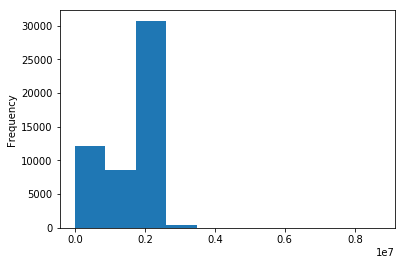

In [144]:
train['License #'].plot.hist()

In [147]:
train['License #'].describe()

count    5.191600e+04
mean     1.549492e+06
std      9.017848e+05
min      0.000000e+00
25%      1.140745e+06
50%      1.958590e+06
75%      2.215506e+06
max      8.700606e+06
Name: License #, dtype: float64

In [169]:
train.Fail.mean()

0.25861006240850604

In [170]:
train[train['License #'] > 3000606.0].Fail.mean()

0.25663716814159293

In [263]:
#677
train['AKA Name'].str.lower().value_counts().head(10)

subway                     880
dunkin donuts              406
mcdonald's                 273
7-eleven                   200
chipotle mexican grill     129
mcdonalds                  120
potbelly sandwich works     94
wendy's                     90
burger king                 87
starbucks coffee            86
Name: AKA Name, dtype: int64

In [0]:
def wrangle5(df):
  df['new_restaurant'] = (df['License #'] > 2000606.0)
  df['old_restaurant'] = (df['License #'] < 500000.0)
  
  def clean_facility(facility):
    facilities = ['restaurant', 'grocery store', 'school']
    if facility in facilities:
      return facility
    else:
      return 'other'
  df['facility_basic'] = df['Facility Type'].apply(clean_facility)
  
    
  df['aka_mcdonalds'] = df['AKA Name'].str.lower().str.contains('donald')
  df['aka_subway'] = df['AKA Name'].str.lower().str.contains('subway')
  df['aka_chipotle'] = df['AKA Name'].str.lower().str.contains('chipotle')
  df['aka_dunkin'] = df['AKA Name'].str.lower().str.contains('dunkin')
  df['aka_wendy'] = df['AKA Name'].str.lower().str.contains('wendy')
  
  return df

train = wrangle5(train)
test = wrangle5(test)

In [280]:
features = ['Facility Type', 'Risk', 'Inspection Type', 'Zip', 'Latitude_NA', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection', 'inspection_complaint',
           'inspection_oob', 'new_restaurant', 'old_restaurant', 'facility_basic',
           'aka_mcdonalds', 'aka_subway', 'aka_chipotle', 'aka_dunkin',
           'aka_wendy']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(drop_invariant=True),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.672642638384755

In [0]:
def wrangle6(df):
  df['inspection_year'] = pd.to_datetime(train['Inspection Date']).dt.year
  df['inspection_month'] = pd.to_datetime(train['Inspection Date']).dt.month
  df['inspection_day_of_wk'] = pd.to_datetime(train['Inspection Date']).dt.dayofweek
  df['inspection_2011'] = (df.inspection_year == 2011)
  return df

train = wrangle6(train)
test = wrangle6(test)

In [295]:
features = ['Facility Type', 'Risk', 'Inspection Type', 'Zip', 'Latitude_NA', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection', 'inspection_complaint',
           'inspection_oob', 'new_restaurant', 'old_restaurant', 'facility_basic',
           'aka_mcdonalds', 'aka_subway', 'aka_chipotle', 'aka_dunkin',
           'aka_wendy', 'inspection_year', 'inspection_2011']

X = train[features]
y = train.Fail

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

pipe = make_pipeline(
    ce.OrdinalEncoder(drop_invariant=True),
    RandomForestClassifier(n_estimators=100))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_val, pipe.predict_proba(X_val).T[1])

0.6783839987900786

In [316]:
enc = ce.TargetEncoder(cols=['License #'])
enc.fit(train, train.Fail)

TargetEncoder(cols=['License #'], drop_invariant=False,
       handle_unknown='impute', impute_missing=True, min_samples_leaf=1,
       return_df=True, smoothing=1.0, verbose=0)

In [0]:
def licensefix(license):
  licenses = [0.0, 1354323.0,   14616.0, 1574001.0, 1974745.0,   55054.0,
              1490035.0,   29151.0, 2083833.0, 1142451.0, 2129398.0, 1884255.0,
              1991275.0, 1448266.0, 1980017.0,   39623.0, 1302136.0, 1045099.0,
                75883.0, 1227055.0, 1194932.0, 2069749.0,   46041.0,   34190.0,
                 3866.0,   33706.0,   36468.0,    4190.0,   70217.0, 1594765.0,
              1476553.0, 2026715.0,   30743.0, 1517920.0, 1879470.0,   34173.0,
                39084.0, 2125165.0,   69637.0,   26281.0, 1273271.0, 1351717.0,
                74496.0,    1368.0, 1000572.0, 2074427.0, 2108657.0,   20481.0,
              1142125.0,    9154.0, 1980306.0,   25152.0,    1094.0, 1514893.0,
                49031.0,    1411.0, 1621425.0, 1144384.0,   23071.0, 1878733.0,
                  644.0,    1058.0,   32534.0,   17576.0,   66191.0, 1273946.0,
                29507.0,   28113.0,   23081.0, 1975927.0, 2048240.0, 1802129.0,
              1678414.0, 1272529.0,   52356.0,    1932.0, 1596210.0]
  if license in licenses:
    return license
  else:
    return 0.0

train['license_lowcard'] = train['License #'].apply(licensefix)
test['license_lowcard'] = test['License #'].apply(licensefix)

In [375]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
enc = ce.TargetEncoder(cols=['license_lowcard'], min_samples_leaf=10)

In [0]:
train2 = pd.read_csv(train_url)
test2  = pd.read_csv(test_url)
train['all_zip'] = train2.Zip
test['all_zip'] = test2.Zip
train['allRisk'] = train2.Risk
test['allRisk'] = test2.Risk

In [401]:
features = ['allRisk', 'all_zip','Inspection Type' 'Latitude_NA', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection', 'inspection_complaint',
           'inspection_oob', 'new_restaurant', 'old_restaurant', 'facility_basic',
           'aka_mcdonalds', 'aka_subway', 'aka_chipotle', 'aka_dunkin',
           'aka_wendy', 'inspection_year', 'inspection_2011']

X_train = train[features]
y_train = train.Fail
X_test = test[features]
y_test = test.Fail


pipe = make_pipeline(
    ce.OrdinalEncoder(drop_invariant=True),
    XGBClassifier(n_estimators=300))
    
pipe.fit(X_train, y_train)

roc_auc_score(y_test, pipe.predict_proba(X_test).T[1])

0.6937500092522082

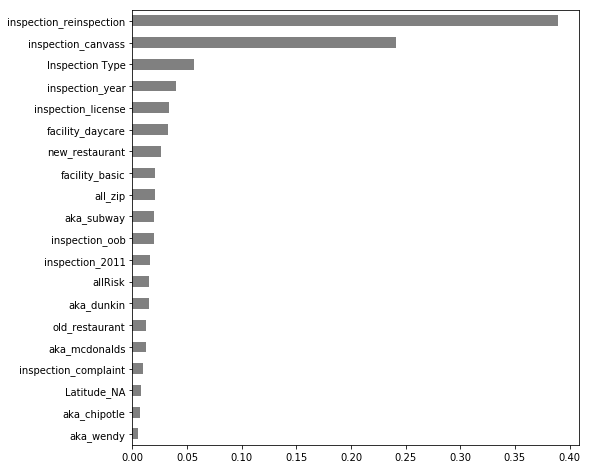

In [398]:
import matplotlib.pyplot as plt
def show_feature_importances(
    pipe, X, y, estimator_name='xgbclassifier', 
    n=20, figsize=(8, 8)):
    
    # pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_, 
        X.columns)

    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='grey')

    
show_feature_importances(pipe, X_train, y_train)

array([0, 0, 0, ..., 0, 0, 0])

In [384]:
enc

659454     1
1498062    1
1162210    1
1418209    1
2050914    1
1465310    1
1471451    1
1473498    1
2102231    1
531414     1
537555     1
277458     1
1360845    1
1166252    1
1506250    1
60360      1
2261957    1
2051004    1
1932218    1
1532857    1
1383350    1
1770421    1
1387440    1
250799     1
363492     1
1937491    1
1960936    1
1166316    1
1235987    1
1961000    1
          ..
1459938    1
539634     1
1418974    1
1425117    1
233243     1
1683231    1
2166603    1
2252577    1
491333     1
1537860    1
1134403    1
2049858    1
2104453    1
2146109    1
1609531    1
1214266    1
509348     1
1480504    1
1632054    1
1376053    1
1767220    1
347317     1
1981270    1
579376     1
1976110    1
1326893    1
1578792    1
1453818    1
1981826    1
1441792    1
Name: Inspection ID, Length: 51916, dtype: int64

In [480]:
features = ['allRisk', 'all_zip','Inspection Type', 
           'facility_daycare', 'inspection_canvass',
           'inspection_license', 'inspection_reinspection',
           'inspection_oob', 'new_restaurant', 'facility_basic',
           'aka_mcdonalds', 'aka_subway',
           'inspection_year', 'Inspection ID', 'License #', 'Longitude',
           'Latitude', 'Facility Type']

X_train = train[features]
y_train = train.Fail
X_test = test[features]
y_test = test.Fail


e = ce.TargetEncoder(cols=['inspection_year', 'all_zip'])

X_train = e.fit_transform(X_train, y_train)
X_test = e.transform(X_test, y_test)


pipe = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=300))
pipe.fit(X_train[features], y_train)

roc_auc_score(y_test, pipe.predict_proba(X_test[features]).T[1])

0.7372642199909525

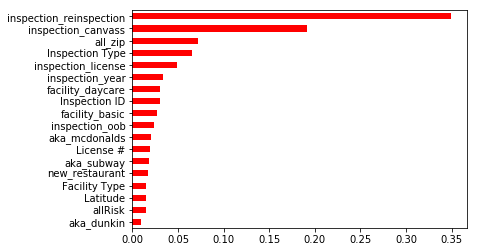

In [472]:
# i cant use cross validation score because of TargetEncoder does not support sklearn pipeline

importances = pd.Series(
        pipe.named_steps['xgbclassifier'].feature_importances_, 
        X_train[features].columns)
top_n = importances.sort_values(ascending=False)
plt.figure()
top_n.sort_values().plot.barh(color='red')

In [482]:
test.Address.value_counts()[:4].keys()

def address_clean(df):
  if address = ['11601 W TOUHY AVE ', '5700 S CICERO AVE ', '324 N LEAVITT ST ',
       '500 W MADISON ST '

Index(['11601 W TOUHY AVE ', '5700 S CICERO AVE ', '500 W MADISON ST ',
       '2300 S THROOP ST '],
      dtype='object')

In [488]:
test.pivot_table(index='Address', values='Fail')

,Fail
Address,
1 E 113TH ST,1.000000
1 E DELAWARE PL,0.000000
1 E JACKSON BLVD,0.250000
1 E WACKER DR,0.250000
1 N DEARBORN ST,0.000000
1 N FRANKLIN ST,0.000000
1 N HALSTED ST,0.200000
1 N LA SALLE ST,0.333333
1 N OGDEN AVE,0.000000
